# Uygulama Notları: 13
## FİZ219 - Bilgisayar Programlama I | 26/01/2020
**Hücre Dizileri**
* Giriş
* Performans ölçümü: tic() ve toc()
   * Fazladan -biraz da ağır- bilgi (isterseniz atlayabilirsiniz)
* Hücre Dizileri
    * Tanımlama
    * Elemanlarına erişim
    * Hücre dizilerine tekrarlı (recursive) ekleme yapmak
* Sonuç

Emre S. Tasci emre.tasci@hacettepe.edu.tr

# Giriş
Derste de defalarca belirttiğimiz üzere, Octave temel olarak, sembolik değil, sayısal bir dildir.

Örneğin, "Sin(x) fonksiyonunun x'e göre türevini al" şeklinde bir istekte bulunamayız. Onun yerine, belirli bir değer aralığında bu fonksiyonu hesaplatır, sonra artış değerlerini bir başka dizide toplayıp kıyaslayabiliriz:

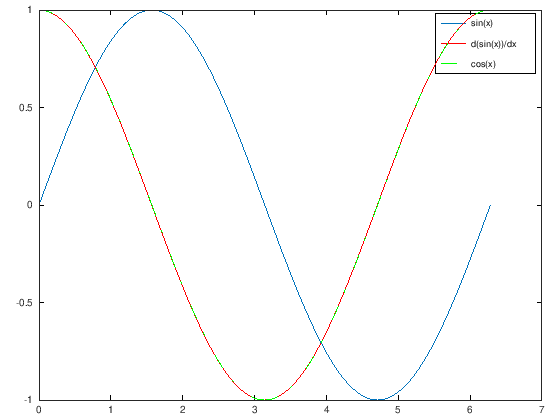

In [1]:
x = linspace(0,2*pi,1000);

% x'deki artis miktari
dx = x(2) - x(1);

sinus = sin(x);

% sinus'deki artis miktarlarini hesaplatip, x'deki artis
% miktarina (yani dx'e) bolelim 
% (dx ne kadar kucukse, turev degerine de o kadar
% yaklasmis oluruz!)
dsinus_dx = (sinus(2:end) - sinus(1:end-1)) / dx;

% Kiyaslama icin bildigimiz turev sonucu ile birlikte cizdirelim:
plot(x,sinus,x(1:end-1),dsinus_dx,"r-",x,cos(x),"g-.")
legend("sin(x)","d(sin(x))/dx","cos(x)")

**Özetle:** Sayısal metotlarla verilen bir fonksiyonun istediğimiz aralıktaki türevini, integralini, vs. hesaplayabiliriz ama sembolik hesap kullanmadığımız için, -varsa- bunun karşılık geldiği fonksiyonu bilemeyebiliriz. 

Yukarıdaki kodda bir şeye daha dikkat edelim: x aralığını `linspace` fonksiyonu yardımı ile elde ettikten sonra, sinüs değerlerimizi teker teker bu aralık üzerinden döngü kullanarak bulmadık; onun yerine bu işi tek satırda, doğrudan `sin()` fonksiyonuna x değerlerini besleyerek bulduk. Yani:

In [2]:
x = linspace(0,2*pi,1000);
sinus = [];
for i = x
    sinus = [sinus sin(i)];
endfor

şeklinde _sol kulağımızı sağ elimizle tutmak_ gibi gereksiz bir yükle değil, doğrudan:

In [3]:
x = linspace(0,2*pi,1000);
sinus = sin(x);

şeklinde, _yapılması gerektiği gibi_ yaptık. Dönemin başında -ve sonra tekrar tekrar- Octave'ın gücünün bu vektör ve matris işlemlerinin topluca ve tek seferde yapılabiliniyor olduğundan geldiğini belirtmiştik. 

## Performans ölçümü: tic() ve toc()
Bu vesileyle, iki yaklaşım arasındaki performans farkını da hesaplayalım. Bunun için iki ölçüm arasında geçen zamanı veren `tic()` ve `toc()` fonksiyonlarını kullanabiliriz: `tic` dediğimizde saymaya başlar, her `toc` dediğimizde de tic'ten beri kaç saniye geçmiş, onun bilgisini verir (parantezsiz şekilde kullanırsak yazılı verir, diğer türlü, yani fonksiyon olarak çağırırsak saniye değerini döndürür).

In [4]:
% Once for dongusu ile yapilan islemi olcelim:
tic
x = linspace(0,2*pi,1000);
sinus = [];
for i = x
    sinus = [sinus sin(i)];
endfor
toc

% Simdi de dogrudan vektor uzerinden:
tic
x = linspace(0,2*pi,1000);
sinus = sin(x);
toc

Elapsed time is 0.0386651 seconds.
Elapsed time is 0.00715017 seconds.


Gördüğünüz üzere, 1000 elemanlı, sözü bile edilmeyecek bir hesapta bile 4 katı hızlı çalışıyor, bu da kulaklarımıza küpe olsun!

8\. Uygulama Notları'nın (_Fonksiyonlar I: Giriş ve basit uygulamalar_) sonunda, "Fonksiyon yazarken dikkat edilecek birkaç şey" başlığı altında, "Fonksiyonunuz farklı türlere kucak açsın" altbaşlığında demiştik ki:

_Unutmayın: Octave öncelikli ve tercihen sayısal bir programlama dilidir, sembolik değil. Bunun nimetlerinden sonuna kadar faydalanın, yazacağınız fonksiyonlarda da faydalandırın. Fonksiyonlarınız vektörleri de (hatta oluyorsa matrisleri de) skalerleri desteklediği kadar desteklesin, çağrıldıkları zaman tek satırda yüz binlerce elemanlı bir vektörün elemanlarını tek tek işleyebilsinler._

burada da bir kez daha bu önemli noktayı anmış olalım!..

Bu şekilde, yani bir seferde işlemi bütün elemanlara uygulamak güzel ama her güzel şeyin olduğu gibi, bunun da bir kusuru var: dizimizin bütün elemanları aynı cinsten olmak zorunda. Sayılarla takıldığımız sürece bu pek sıkıntı çıkarmıyor, örneğin:

In [5]:
dizi_tamsayilar = [-5 6 0 2 -33]
dizi_ondalikli  = [1.2 6 3.4 -7.5]
dizi_karmasik   = [1+3*j 6 -2-5*j]

dizi_tamsayilar =

   -5    6    0    2  -33

dizi_ondalikli =

   1.2000   6.0000   3.4000  -7.5000

dizi_karmasik =

   1 + 3i   6 + 0i  -2 - 5i



Yukarıda farklı cins sayılardan oluşan üç tane dizi tanımladık, hepsinde de "ortak" olan bir eleman var: 6. Bu 6 sayısının tam sayılar dizisinde, ondalıklı sayılar ve karmaşık (kompleks) sayılar dizilerinde nasıl kılıktan kılığa büründüğüne dikkat edin! (bu vesileyle, kompleks sayıları bu dönem derste hiç kullanmadık ama $\sqrt{-1}$'in temel bilimlerde <em>i</em> , mühendislik bilimlerinde ise genelde _j_ ile gösterildiği aklınızın bir köşesinde dursun 8).

Şimdi biraz deneysel takılalım: tam sayılar dizisine ondalıklı bir sayı; ondalıklı sayılar dizisine de karmaşık bir sayı ekleyip, ne olacağına göz atalım:

In [6]:
dizi_tamsayilar = [dizi_tamsayilar 3.4]
dizi_ondalikli  = [dizi_ondalikli 1+3*j]

dizi_tamsayilar =

   -5.00000    6.00000    0.00000    2.00000  -33.00000    3.40000

dizi_ondalikli =

 Columns 1 through 4:

   1.2000 + 0.0000i   6.0000 + 0.0000i   3.4000 + 0.0000i  -7.5000 + 0.0000i

 Column 5:

   1.0000 + 3.0000i



Sanki bir "virüs" bulaşmış gibi, daha biraz öncesine kadar tam sayılardan mürekkep dizimiz ondalıklı sayılara; ondalıklı sayılardan oluşan dizimiz ise karmaşık sayılara dönüştü! (bu hiyerarşinin merkezinde de tam sayıların ondalıklı sayıların; ondalıklı sayıların da karmaşık sayılar kümesinin alt grubu olmasında buluyoruz: $\mathbb{Z}\subset\mathbb{Q}\subset\mathbb{C}$)

### Fazladan -biraz da ağır- bilgi (isterseniz atlayabilirsiniz)
Bu davranışın sebebi, tam da yukarıda bahsettiğimiz işlemlerin dizilerin bütün elemanlarına tek seferde uygulanabilme kolaylığı. Hikayesi de şu: bilgiler hafızada bir adresten başlayarak çeşitli boyutlarda kutularda tutulurlar. Her bir kutunun boyutu, onun içinde kaç tane 0/1 den oluşan kutucuklardan olduğuna bakar (bu kutucukların her birine "bit" denir). Örneğin 3-bitlik bir kutuda 3 tane 0/1 değerini alabilen kutucuk vardır, bu da saklayabileceği $2^3 = 8$ farklı bilgi olacağını gösterir, şöyle ki:

|A|B|C|10'luk sistemdeki karşılığı
|---|---|---|:---|
|0|0|0|0|
|0|0|1|1|
|0|1|0|2|
|0|1|1|3|
|1|0|0|4|
|1|0|1|5|
|1|1|0|6|
|1|1|1|7|

(10'luk sistemdeki karşılığı çok da önemli değil, tam sayı yerine harf de tutuyor olabilirdi)

Biz bir dizi oluşturduğumuz zaman, o diziye verdiğimiz ada karşılık olarak aslında bir adres (hafızada o dizinin başlangıç adresi) atanıyor. Diziyi oluşturan bütün elemanların cinsi aynı olduğundan dolayı, biz de (Octave da) o cinsin boyutunu bildiğinden, örneğin `dizi(4)` deyince, dizinin başladığı adrese gidip, 3 eleman atlayıp, 4.'nün başladığı yere geliyor (yani bir nevi o elemanın yaşadığı kutunun başına ışınlanıyor), bu yüzden de hızlıca işlemleri yapabiliyoruz.

Ama bazen biz bir matrisin 1. sütununa öğrenci numaralarını; 2. sütununa öğrenci adlarını; 3. ve 4. sütunlara ara sınav notlarını; 5. sütuna genel sınav notunu; 6. sütuna ortalamasını; 7. sütuna da e-posta adresini yazmak isteyebiliriz. Fakat dizinin bütün elemanlarının cinslerinin aynı olması zorunluluğundan ötürü, haydi numarayı, sınav notlarını ortalama ile birlikte ondalıklı olarak temsil ettik diyelim, isim ile e-posta adreslerini ne yapacağız? Tam sayı -> Ondalıklı sayı -> Karmaşık sayı yükseltmesinden ilhamla, "Sayıları da karakter/yazı/string olarak temsil edelim!" fikri aklınızdan geçebilir ama $2+4.5$ veya $4.5 + (3-2j)$ işlemlerinin sayılarda karşılığı olsa da, $4 + \text{sururi}$ işleminin pek de işimize yarar bir karşılığı yok. Bu nedenle sayılara yapabildiğimiz işlemlerle, stringlere yapabildiğimiz işlemler kati şekilde ayrı durmakta.

## Hücre Dizileri
### Tanımlama
Bu kadar girişten sonra, asıl konumuza geçelim, yani: **Hücre Dizileri**ne (_Cell Arrays_). Hücre dizileri farklı türden değişkenleri bir arada tutan dizilerdir. Şimdiye kadar kullanageldiğimiz dizileri CD dolaplarına benzetirsek, hücre dizileri de farklı boylarda gözleri olan farklı boylardaki çekmeceleri içeren bir dolaba da benzetilebilir.

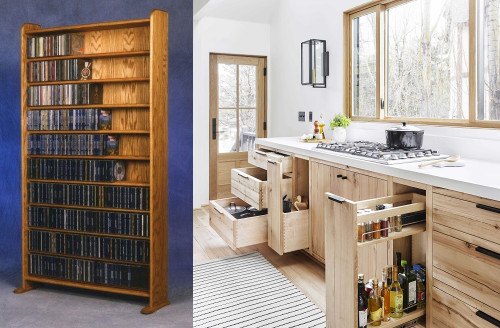  
Resimleri aldığım yerler: [CD Dolabı: National Furniture Supply](https://www.nationalfurnituresupply.com/10-shelf-cd-cabinet-1002-3.html) | [Mutfak çekmeceleri: Emily Henderson](https://stylebyemilyhenderson.com/blog/kitchen-organization-hacks)

Nasıl ki tamamıyla ya da kısmen dolu olsun, bir CD dolabında maksimum kaç tane CD kutusu olabileceğini, ilgilendiğimiz bir CD'nin hangi rafta soldan kaçıncı CD olduğunu net bir şekilde tarif edebiliriz; içindeki bütün elemanlara aynı işlemi yapabileceğimizi (örneğin mp3'e çevirmek) biliriz, normal dizilerde de bütün bu lükse sahibiz. Tıpkı bizim sayı dizilerimizde olduğu gibi "ben ikinci rafa sadece 10 tane CD koyacağım, o zaman onun genişliği de diğerlerinden o ölçüde kısa olsun" diyemeyiz: o rafa 1 tane de CD koysak, 10 tane de CD koysak, o rafın genişliği değişmez, bu da şuna karşılık geliyor demek:


In [7]:
sayi_dizisi = [1 2 3; 4 5 6]
sayi_dizisi(3,2) = 7

sayi_dizisi =

   1   2   3
   4   5   6

sayi_dizisi =

   1   2   3
   4   5   6
   0   7   0



Sonuçta biz 3. rafın sadece ortasını kullanıyoruz _(3,2)_ ama yok öyle bir şey: sayı dizilerinin nimetlerinden faydalanacaksak, standard genişlik ve standard türü peşinen kabul etmişiz demektir -- biz istesek de istemesek de, raftaki diğer pozisyonların da hesaba katılması gerekmektedir.

Hücre dizileri ise bu konuda alabildiğine özgürdürler, şu örneğe bir bakalım:

In [8]:
hucre_dizisi = {1,"FİZ219",1.23}

hucre_dizisi =
{
  [1,1] =  1
  [1,2] = FİZ219
  [1,3] =  1.2300
}



### Elemanlarına erişim
Hücre dizilerini sayı dizilerinden ayırmak için işlemlerinde köşeli parantezler ([] -- _square brackets_) yerine süslü parantezler ({} -- _braces_) kullanırız. Elemanlara erişirken de aynı yolu takip ederiz:

In [9]:
hucre_dizisi{2}

ans = FİZ219


Elimizdeki hücre dizisi an itibarı ile (1x3)lük bir dizi, o halde gelin "2. katı çıkalım":

In [10]:
hucre_dizisi{2,4} = "FİZ371"

hucre_dizisi =
{
  [1,1] =  1
  [2,1] = [](0x0)
  [1,2] = FİZ219
  [2,2] = [](0x0)
  [1,3] =  1.2300
  [2,3] = [](0x0)
  [1,4] = [](0x0)
  [2,4] = FİZ371
}



Gösterim sayı dizilerinden biraz farklı olsa da (sayı dizilerinde bir satırın sütunları sıralanıp, bitince diğer satıra geçiliyordu; burada ise sütun sütun listelenmekte), 2. satırın 4. sütununu tanımlayınca boy yine eşitlendi (1x3)lük bir matristen (2x4)lük bir matrise geçildi, eksik hücreler de boş olarak tanımlandı. Bu konuda çok da büyük bir değişiklik yok.

Bir de şöyle bir şey tanımladığımızı varsayalım:

In [11]:
hucre_dizisi{2,3} = [5 4 3; 2 1 0]

hucre_dizisi =
{
  [1,1] =  1
  [2,1] = [](0x0)
  [1,2] = FİZ219
  [2,2] = [](0x0)
  [1,3] =  1.2300
  [2,3] =

     5   4   3
     2   1   0

  [1,4] = [](0x0)
  [2,4] = FİZ371
}



Hatta ve hatta:

In [12]:
hucre_dizisi{1,4} = {5,"Bilgisayar Programlama I", "Emre S. Tasci"}

hucre_dizisi =
{
  [1,1] =  1
  [2,1] = [](0x0)
  [1,2] = FİZ219
  [2,2] = [](0x0)
  [1,3] =  1.2300
  [2,3] =

     5   4   3
     2   1   0

  [1,4] =
  {
    [1,1] =  5
    [1,2] = Bilgisayar Programlama I
    [1,3] = Emre S. Tasci
  }

  [2,4] = FİZ371
}



Bu nasıl bir büyücülüktür böyle!!! Farklı türden değerleri bir arada tuttuğu yetmiyormuş gibi, farklı türden değerleri içeren dizileri de eleman olarak kabul ediyor -- yani bir çeşit _dizilerin dizisi_ (aslında "dizi dizisi" daha doğru oluyor ama kulağa pek hoş gelmiyor).

**Soru 1:** Yukarıdaki `hucre_dizisi`nin (1,4). elemanı olan hücre dizisinin 2. elemanı olan "Bilgisayar Programlama I"e nasıl ulaşırız?

In [13]:
# Cevap:
hucre_dizisi{1,4}{2}

ans = Bilgisayar Programlama I


**Soru 2:** Peki, `hucre_dizisi`nin (2,3). elemanı olan sayı dizisinin (2,1). elemanı olan 2 değerine nasıl ulaşırız?

In [14]:
# Cevap:
hucre_dizisi{2,3}(2,1)

ans =  2


İki durumda da yaptığımız aynı şey aslında: ilk olarak hücre dizisinin ilgili elemanının kapısına gidiyoruz (1. soruda bu ev bir başka hücre dizisi; 2. soruda bir sayı dizisi - ama ikisinde de hücre dizisinin sokağında, bu yüzden o adreste ({1,4} veya {2,3}) barındırdığı eleman hücre dizisi de olsa, sayı dizisi de olsa, hücrenin elemanı). Kapıya vardıktan sonra eğer önümüzdeki bir mutfak dolabı (/hücre dizisi) ise onun ilgili çekmecesini {2} açıyoruz; eğer CD rafı (/sayı dizisi) ise bu sefer onun ilgili satır/sütununa gidiyoruz (2,1) <-- sayı dizisi olduğundan, biz de sayı dizisi standardını kullanıyoruz.

 ### Hücre dizilerine tekrarlı (_recursive_) ekleme yapmak

Sayı dizilerimize tekrarlı eklemeleri dizinin kendisine referans vererek yapabiliyorduk, örneğin:

In [15]:
# Cift sayilari ayiralim:
sonuc = [] # sonuclari toplayacagimiz -simdilik- bos kume
for i=1:10
    if (mod(i,2)==0)
        sonuc = [sonuc i]; # sonuc'un dibine secili i'yi ekliyoruz
    endif
endfor

sonuc

sonuc = [](0x0)
sonuc =

    2    4    6    8   10



Hücre dizilerinde ise bu _tıpatıp_ aynı değil. Farkı görmek için, önce _düşündüğümüz şekliyle_, sayı dizilerinden ilham alarak yapmaya çalışalım:

In [16]:
# Cift sayilari bu sefer hucre dizisi icine ayiralim:
sonuc = {} # sonuclari toplayacagimiz -simdilik- bos kume
for i=1:10
    if (mod(i,2)==0)
        sonuc = {sonuc i}; # sonuc'un dibine secili i'yi ekliyoruz
    endif
endfor

sonuc

sonuc = {}(0x0)
sonuc =
{
  [1,1] =
  {
    [1,1] =
    {
      [1,1] =
      {
        [1,1] =
        {
          [1,1] = {}(0x0)
          [1,2] =  2
        }

        [1,2] =  4
      }

      [1,2] =  6
    }

    [1,2] =  8
  }

  [1,2] =  10
}



Sonuç hiç de beklediğimiz gibi olmadı, tekrarın dibine vurduk (zira dikkat ederseniz, içten dışa doğru dallanıp budaklanıyor). Bunun teknik sebebi, hücre dizilerinin elemanlarının kendilerini değil, aslında onların saklandığı hafıza adreslerini tutmalarından kaynaklanıyor.

Tekrarlı eklemelerde hücre dizisinin kendisine referans verirken yapmamız gereken, onun tüm elemanlarını (`hucre_dizisi{:}`) içerttirmek:

In [17]:
# Cift sayilari bu sefer hucre dizisi icine ayiralim:
# - 2. deneme...-

sonuc = {} # sonuclari toplayacagimiz -simdilik- bos kume
for i=1:10
    if (mod(i,2)==0)
        sonuc = {sonuc{:} i}; # sonuc'un dibine secili i'yi ekliyoruz
    endif
endfor

sonuc

sonuc = {}(0x0)
sonuc =
{
  [1,1] =  2
  [1,2] =  4
  [1,3] =  6
  [1,4] =  8
  [1,5] =  10
}



## Sonuç
Sonuç itibarı ile, hücre dizileri depolamak, sayı dizileri ise elemanları üzerinde hızlıca işlem yapmak için kullanılırlar. Hücre dizilerinden sonuçlarımızı kategorize etmek için veya ara işlemler sırasında elimize geçen değerlerden saklamak istediklerimizi bir kenara koymak için faydalanabiliriz ama unutmamalıyız ki (bkz. yukarıdaki "Performans ölçümü: tic() ve toc()" bölümü), GNU Octave'ın gücü vektörel işlemlerin seriliğinden gelir ki, bu özellik de karma elementlere (tam sayı, ondalık sayı, string, dizi, hücre dizisi, ne ararsanız) olan desteğinden dolayı hücre dizilerinde bulunmamaktadır.